# Como funciona una red neuronal - Regresión lineal

Como hemos dicho una neurona es una unidad de procesamiento, recibe unas señales, realiza unos cálculos y saca otra señal.

<div style="text-align:center;">
  <img src="Imagenes/red_neuronal_artificial.jpg" alt="red_neuronal_artificial"> <!-- style="width:425px;height:626px;" -->
</div>

Así que vamos a ver el ejemplo más sencillo, el caso en el que se recibe una señal y se saca otra, y lo vamos a ver con la regresión lineal

<div style="text-align:center;">
  <img src="Imagenes/red_neuronal_regresion.png" alt="red neuronal regresion"> <!-- style="width:425px;height:626px;" -->
</div>

Supongamos que hemos hecho unas medidas y obtenemos los siguientes puntos

In [1]:
import numpy as np

x = np.array( [ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

z = np.array( [-0.16281253,  1.88707606,  0.39649312,  0.03857752,  4.0148778 ,
        0.58866234,  3.35711859,  1.94314906,  6.96106424,  5.89792585,
        8.47226615,  3.67698542, 12.05958678,  9.85234481,  9.82181679,
        6.07652248, 14.17536744, 12.67825433, 12.97499286, 11.76098542,
       12.7843083 , 16.42241036, 13.67913705, 15.55066478, 17.45979602,
       16.41982806, 17.01977617, 20.28151197, 19.38148414, 19.41029831])

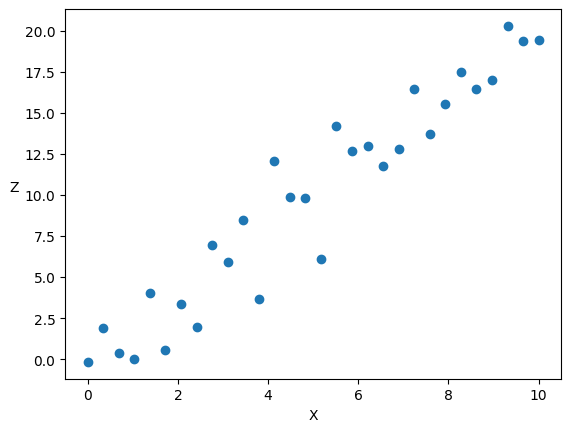

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, z)
plt.xlabel('X')
plt.ylabel('Z  ', rotation=0)
plt.show()

Como vemos esto se puede asemejar a una regresión lineal. Es decir, podemos suponer que la neurona, recibe ```x```, lo multiplica por un número y saca ```z```

<div style="text-align:center;">
  <img src="Imagenes/red_neuronal_regresion.png" alt="red neuronal regresion"> <!-- style="width:425px;height:626px;" -->
</div>

A partir de aquí vamos a mostrar cómo funcionan las redes neuronales, solo que con un ejemplo sencillo de una sola neurona, luego iremos mostrando ejemplos cada vez más complejos, hasta que explicaremos el funcionamiento general de las redes neuronales. Pero si entiendes lo que va a pasar a continuación vas a entender las redes neuronales

Nuestra neurona tiene el parámetro ```a```, que es el que queremos cambiar para que la recta que va a generar se asemeje lo máximo posible a los puntos. El proceso de aprendizaje de nuestra neurona va a consistir en mediante unos cuantos cálculos determinar el mejor valor posible de ```a```

## Inicialización aleatoria del parámetro

Este ejemplo es sencillo, pero cuando tenemos redes neuronales complejas y no sabemos qué valores tienen que tener sus parámetros, lo que se hace es inicializarlos aleatoriamente

In [3]:
import random

random.seed(45) # Esto es una semilla, cuando se generan números aleatorios, 
                # pero queremos que siempre se genere el mismo se suele fijar
                # un número llamado semilla. Esto hace que siempre a sea el mismo

a = random.random()
a

0.2718754143840908

El valor de a es 0.271875, veamos qué recta saldría si parásemos ahora

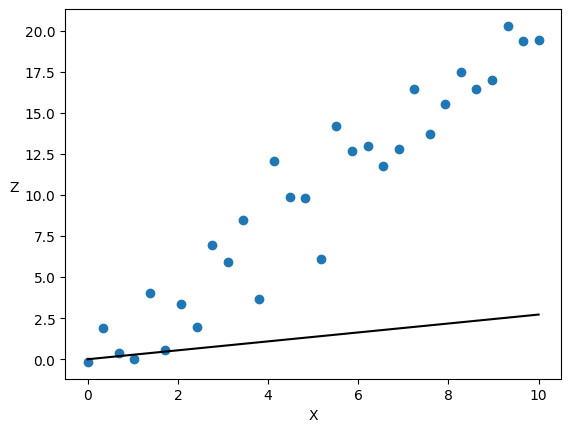

In [4]:
z_p = a*x

plt.scatter(x, z)
plt.plot(x, z_p, 'k')
plt.xlabel('X')
plt.ylabel('Z  ', rotation=0)
plt.show()

Como vemos no se parece en nada, así que vamos a tener que hacer que nuestra neurona *aprenda*

## Cálculo del error o loss

Para buscar el mejor valor posible de ```a``` queremos encontrar un valor que haga que los valores predichos por nuestra neurona tengan el menor error posible con los valores reales de ```z```

En este tipo de problemas se suele utilizar el [error cuadrático medio (ECM)](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio) o [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) en inglés. Hay muchas más funciones de error, pero de momento no vienen al caso, así que quédate con esta y ya aprenderemos más funciones más adelante

En la literatura a este error se le suele llamar función de pérdida o loss function, por lo que a partir de ahora lo llamaremos así

El error cuadrático medio (ECM) mide la distancia entre los puntos predichos por nuestra neurona y los valores reales de ```z```, de ahí la palabra *error* dentro de su nombre

$$\left(z_p-z\right)$$

<div style="text-align:center;">
  <img src="Imagenes/mean_squared_error.png" alt="mean squared error"> <!-- style="width:425px;height:626px;" -->
</div>

Sin embargo a veces esa distancia va a ser positiva y a veces negativa, según si se toma primero el valor predicho por nuestra neurona o el valor de ```z```, por lo que dicha distancia se eleva al cuadrado, de ahí la palabrea *cuadrático* del nombre

$$\left(z_p-z\right)^2$$

Por último se suman todas las distancias elevadas al cuadrado y se divide entre el número de muestras, vamos, lo que es hacer una media de toda la vida, de ahí la palabra *medio* del nombre

$$loss = \frac{\sum_{i=1}^{N} \left(z_p-z\right)^2}{N}$$

Ya tenemos la manera de calcular el ECM (error cuadrático medio)

En nuestro caso nuestra pérdida es

In [5]:
def loss(z, z_p):
    n = len(z)
    loss = np.sum((z_p-z) ** 2) / n
    return loss

In [6]:
error = loss(z, z_p)
error

103.72263739946467

Aunque esto no nos dice mucho, hay que recordar que buscamos el mínimo de la función de error. Por lo que deberíamos buscar un valor cercano a 0.

Veamos cómo cambia la función de pérdida (loss) en función del valor de ```a```

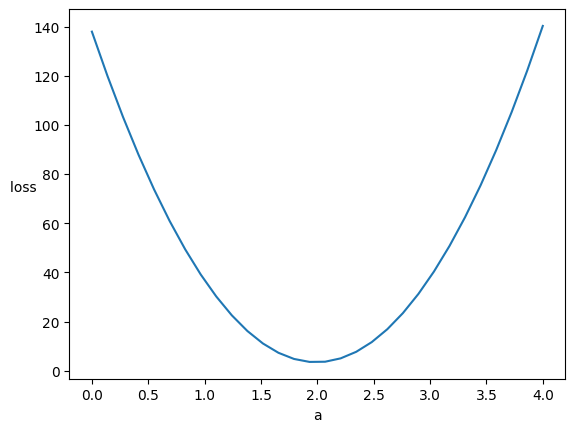

In [7]:
posibles_a = np.linspace(0, 4, 30)
perdidas = np.empty_like(posibles_a)

for i in range (30):
    z_p = posibles_a[i]*x
    perdidas[i] = loss(z, z_p)

plt.plot(posibles_a, perdidas)
plt.xlabel('a')
plt.ylabel('loss  ', rotation=0)
plt.show()

Podemos ver que el error o pérdida es menor cuando ```a``` vale en torno a 2. Podrías pensar, ya está, problema solucionado, y es cierto. Pero como te dije íbamos a empezar con el problemas más sencillo, por lo que mirando una gráfica lo podemos solucionar.

Si el problema tuviese 2 parámetros podríamos revisar un gráfico de 3 dimensiones para buscar el mínimo

<div style="text-align:center;">
  <img src="Imagenes/matplotlib_3d.jfif" alt="grafico 3 diemnsiones"> <!-- style="width:425px;height:425px;" -->
</div>

Pero en cuanto nuestro problema tuviese más de 2 parámetros ya no podríamos buscar el minimo error con una gráfica. Por no decir que las redes neuronales tienen millones de parámetros, por ejemplo, la red neuronal resnet18 (que más tarde la estudiaremos) es una red pequeña y tiene en torno a 11 millones de parámetros. Es imposible buscar el mínimo error ahí de manera manual. De modo que necesitamos un método automático mediante cálculos

## Descenso del gradiente

Como hemos dicho, necesitamos encontrar el valor de ```a``` que haga que la función de pérdida sea mínima y a su vez hacerlo mediante un algoritmo.

Una de las peculiaridades de un mínimo de una función es que su gradiente o derivada es 0

Si no sabes lo que es la derivada o gradiente, la derivada de una función en un punto representa la pendiente de la recta tangente a la función en ese punto

<div style="text-align:center;">
  <img src="Imagenes/derivada.png" alt="derivada"> <!-- style="width:425px;height:425px;" -->
</div>

Por ejemplo, en esta imagen, la derivada de A, B y C son las lineas verde, azul y negra respectivamente

La derivada mide la pendiente de una función, cuanto más pendiente tiene la función en un punto, más perpendicular al *eje x* será la derivada en ese punto y cuanto menos pendiente tiene la función en un punto, más paralela al *eje x* será la derivada en ese punto

¿Cómo se calcula el gradiente de la función de pérdida con respecto a `a`? La función de pérdida habíamos dicho que era

$$loss = \frac{\sum_{i=1}^{N} \left(z_p-z\right)^2}{N}$$

Pues bien, si la derivamos con respecto a `a` nos queda

$$\frac{\partial loss}{\partial a} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z_p-z\right)^2}{N}\right)}{\partial a} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(ax-z\right)^2}{N}\right)}{\partial a} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(ax-z\right) x} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(z_p-z\right) x}$$

Si volvemos a ver la gráfica de la función de pérdida con respecto el valor de ``a``, cuanto mayor pendiente tenga la función, es decir, cuanto mayor sea la derivada, más lejos estaremos del mínimo. Y cuanto menor sea la derivada, menor pendiente, más cerca estaremos del mínimo

In [8]:
def gradiente (a, x, z):
    # Función que calcula el valor de una derivada en un punto
    n = len(z)
    return 2*np.sum((a*x - z)*x)/n

In [9]:
def gradiente_linea (i, a=None, error=None, gradiente=None):
    # Función que devuleve los puntos de la linea que supone la derivada de una 
    # función en un punto dado
    if a is None:
        x1 = posibles_a[i]-0.7
        x2 = posibles_a[i]
        x3 = posibles_a[i]+0.7

        b = perdidas[i] - gradientes[i]*posibles_a[i]

        z1 = gradientes[i]*x1 + b
        z2 = perdidas[i]
        z3 = gradientes[i]*x3 + b
    else:
        x1 = a-0.7
        x2 = a
        x3 = a+0.7

        b = error - gradiente*a

        z1 = gradiente*x1 + b
        z2 = error
        z3 = gradiente*x3 + b

    x_linea = np.array([x1, x2, x3])
    z_linea = np.array([z1, z2, z3])

    return x_linea, z_linea

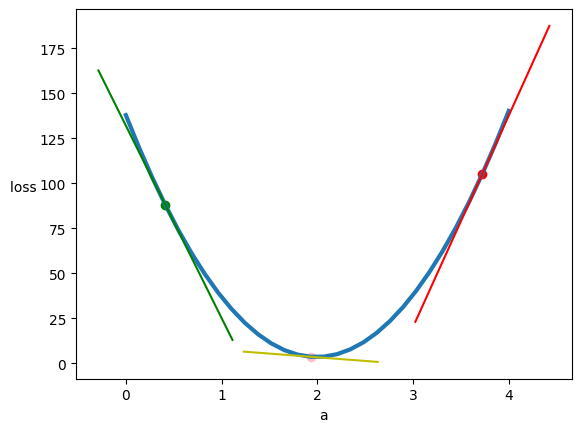

In [10]:
posibles_a = np.linspace(0, 4, 30)
perdidas = np.empty_like(posibles_a)
gradientes = np.empty_like(posibles_a)

for i in range (30):
    z_p = posibles_a[i]*x
    perdidas[i] = loss(z, z_p)
    gradientes[i] = gradiente(posibles_a[i], x, z)  # Estos son los valores de las derivadas en cada valor de a
                                                    # es decir, nos da el valor de la pendiente de la recta tangente
                                                    # a la curva

# Se calcula la linea del gradiente en el inicio
i_inicio = 3
x_inicio, z_inicio = gradiente_linea(i_inicio)

# Se calcula la linea del gradiente en la base
i_base = 14
x_base, z_base = gradiente_linea (i_base)

# Se calcula la linea del gradiente al final
i_final = -3
x_final, z_final = gradiente_linea (i_final)


# Se dibuja el error en función de a
plt.plot(posibles_a, perdidas, linewidth = 3)
# Se dibuja la derivada al inicio
plt.plot(x_inicio, z_inicio, 'g')
plt.scatter(posibles_a[i_inicio], perdidas[i_inicio], c='green')
# Se dibuja la derivada en el medio
plt.plot(x_base, z_base, 'y')
plt.scatter(posibles_a[i_base], perdidas[i_base], c='pink')
# Se dibuja la derivada al final
plt.plot(x_final, z_final, 'r')
plt.scatter(posibles_a[i_final], perdidas[i_final], c='red')

plt.xlabel('a')
plt.ylabel('loss     ', rotation=0)
plt.show()

Como se puede ver, al inicio de la gráfica, estamos lejos del mínimo, por lo que la derivada de la función (linea verde) es muy empinada, igual que al final de la función (linea roja). Sin embargo cuando estamos cerca del mínimo la derivada es pequeña (linea amarilla).

Recordatorio, lo que queremos es modificar el valor de `a` que haga que la función de coste sea mínima. Esto supone que el error en todos los pares `(x, z)` va a ser el menor posible. Pues bien, ya tenemos una manera de saber cómo de lejos o cerca estamos de ese mínimo. Ahora necesitamos saber cómo modificar `a` para hacer que esté en la zona de mínimo coste.

La forma de hacer esto es mediante el **descenso del gradiente** o **gradient descent** en inglés. Lo que vamos a hacer es modificar el valor de `a` en función del valor del gradiente

$$a' = a - \alpha\frac{\partial loss}{\partial a}$$

Como se puede ver a `a` se le resta la derivada de la función de pérdida multiplicada por $\alpha$ que se conoce como **tasa de aprendizaje** o **learning rate** en inglés. Vamos a ver esto por partes

Primero, a `a` se le resta la derivada de la función de pérdida, veamos por qué. Supongamos que estamos en el primer punto de la función de coste (el de la linea verde), como hemos visto su derivada tiene una gran pendiente, pero además esta es negativa (ya que si nos desplazamos de izquierda a derecha la derivada va hacia abajo), por lo que si a `a` se le resta un valor negativo, en realidad lo que estamos haciendo es sumarle un valor, es decir, estamos haciendo que `a` sea mayor, por lo que lo estamos acercando a la zona del mínimo.

Ahora al revés, supongamos que estamos en el último punto (el de la linea roja), en ese punto la derivada tiene una gran pendiente, pero además es positiva (ya que si nos desplazamos de izquierda a derecha la derivada va hacia arriba). En ese punto por tanto estamos restando a `a` un número positivo, es decir, estamos haciendo a `a` más pequeña, la estamos acercando a la zona del mínimo

Veamos ahora qué significa el **learning rate** $\alpha$

Este es un factor de aprendizaje que nosotros elegimos, es decir, estamos configurando con qué velocidad se moverá `a`. Es decir, estamos configurando la velocidad de aprendizaje de la red neuronal. Cuanto más grande sea $\alpha$ más rápido aprenderá la red, mientras que cuanto más pequeño más lento aprenderá.

Más adelante estudiaremos qué ocurre al cambiar el valor de $\alpha$, pero de momento quédate con que valores típicos de $\alpha$ son entre $10^{-3}$ y $10^{-4}$

## Bucle de entrenamiento

Ya tenemos una manera de saber el error que nos introduce el valor de `a` elegido y una fórmula para modificar el valor de `a`. Ya solo hace falta repetir este bucle varias veces hasta que lleguemos al mínimo de la función de coste

In [11]:
lr = 10**-3 # Tasa de aprendizaje o learning rate
steps = 100  # Numero de veces que se realiza el bucle de enrtenamiento

# Matrices donde se guardarán los datos para luego ver la evolución del entrenamiento en una gráfica
Zs = np.empty([steps, len(x)])
Xs_linea_gradiente = np.empty([steps, len(x_inicio)])
Zs_linea_gradiente = np.empty([steps, len(z_inicio)])
As = np.empty(steps)
Errores = np.empty(steps)


for i in range(steps):
    # Calculamos el gradiente
    dl = gradiente(a, x, z)

    # Corregimos el valor de a
    a = a - lr*dl

    # Calculamos los valores que obtiene la red neuronal
    z_p = a*x

    # Obtenemos el error
    error = loss(z_p, z)

    # Obtenemos las rectas de los gradientes para representarlas
    x_linea_gradiente, z_linea_gradiente = gradiente_linea(i_inicio, a=a, error=error, gradiente=dl)

    # Guardamos los valores para luego ver la evolución del entrenamiento en una gráfica
    As[i] = a
    Zs[i,:] = z_p
    Errores[i] = error
    Xs_linea_gradiente[i,:] = x_linea_gradiente
    Zs_linea_gradiente[i,:] = z_linea_gradiente

    # Imprimimos la evolución del entrenamiento
    if (i+1)%10 == 0:
        print(f"i={i+1}: error={error}, gradiente={dl}, a={a}")

i=10: error=28.075728775043547, gradiente=-61.98100236918255, a=1.1394358551489718
i=20: error=9.50524503591466, gradiente=-30.709631939506394, a=1.569284692740735
i=30: error=4.946395605365449, gradiente=-15.215654116766258, a=1.7822612353503635
i=40: error=3.8272482302958437, gradiente=-7.5388767490642445, a=1.887784395436304
i=50: error=3.552509863476323, gradiente=-3.7352756707945205, a=1.9400677933076504
i=60: error=3.4850646173147437, gradiente=-1.8507112931062708, a=1.9659725680580205
i=70: error=3.4685075514689503, gradiente=-0.9169690786711168, a=1.978807566971417
i=80: error=3.464442973977972, gradiente=-0.4543292594425819, a=1.9851669041474533
i=90: error=3.4634451649256888, gradiente=-0.22510581958202128, a=1.9883177551597053
i=100: error=3.463200213782052, gradiente=-0.111532834297016, a=1.989878902465877


Vamos a represenar en una gráfica la evolución del entrenamiento

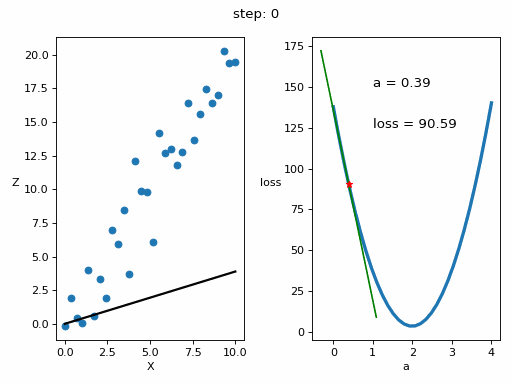

In [19]:
# Creamos GIF con la evolución del entrenamiento

from matplotlib.animation import FuncAnimation
from IPython.display import display, Image

# Creamos la gráfica inicial
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_tight_layout(True)
ax1.set_xlabel('X')
ax1.set_ylabel('Z  ', rotation=0)
ax2.set_xlabel('a')
ax2.set_ylabel('loss     ', rotation=0)

# Se dibujan los datos que persistiran en toda la evolución de la gráfica
ax1.scatter(x, z)
ax2.plot(posibles_a, perdidas, linewidth = 3)

# Se dibuja el resto de lineas que irán cambiando durante el entrenamiento
line1, = ax1.plot(x, Zs[0,:], 'k', linewidth=2)                             # Recta generada con la pendiente a aprendida
line2, = ax2.plot(Xs_linea_gradiente[0,:], Zs_linea_gradiente[0,:], 'g')    # Gradiente de la función de error
punto2, = ax2.plot(As[0], Errores[0], 'r*')                                 # Punto donde se calcula el gradiente

# Se dibujan textos dentro de la segunda figura del subplot
fontsize = 12
a_text = ax2.text(1, 150, f'a = {As[0]:.2f}', fontsize = fontsize)
error_text = ax2.text(1, 125, f'loss = {Errores[0]:.2f}', fontsize = fontsize)

# Se dibuja un título
titulo = fig.suptitle(f'step: {0}', fontsize=fontsize)

# Se define la función que va a modificar la gráfica con la evolución del entrenamiento
def update(i):
    # Se actualiza la linea 1. Recta generada con la pendiente a aprendida
    line1.set_ydata(Zs[i,:])
    
    # Se actualiza la linea 2. Gradiente de la función de error
    line2.set_xdata(Xs_linea_gradiente[i,:])
    line2.set_ydata(Zs_linea_gradiente[i,:])

    # Se actualiza el punto 2. Punto donde se calcula el gradiente
    punto2.set_xdata([As[i]])
    punto2.set_ydata([Errores[i]])

    # Se actualizan los textos
    a_text.set_text(f'a = {As[i]:.2f}')
    error_text.set_text(f'loss = {Errores[i]:.2f}')
    titulo.set_text(f'step: {i}')

    return line1, ax1, line2, punto2, ax2, a_text, error_text

# Se crea la animación con un refresco cada 200 ms
interval = 200 # ms
anim = FuncAnimation(fig, update, frames=np.arange(0, steps), interval=interval)

# Se guarda la animación en un gif
gif_name = "GIFs/entrenamiento_regresion.gif"
anim.save(gif_name, dpi=80, writer='pillow') 

# Leer el GIF y mostrarlo
with open(gif_name, 'rb') as f:
    display(Image(data=f.read()))

# Se elimina la figura para que no se muestre en el notebook
plt.close()

# Resumen

Vamos a volver a explicar el proceso, pero sin pararnos tanto en cada detalle para afianzar los conceptos

Tenemos los siguientes valores `x` e `y`

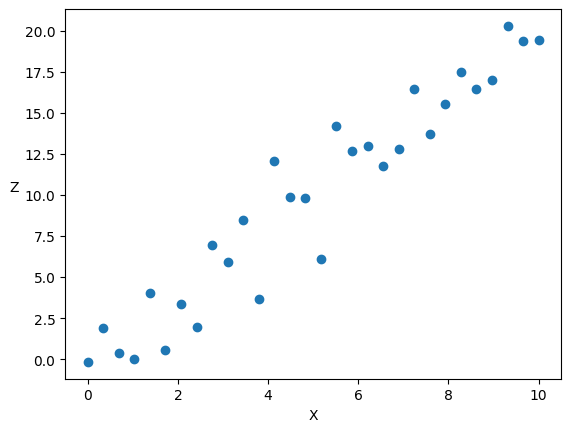

In [20]:
x = np.array( [ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

z = np.array( [-0.16281253,  1.88707606,  0.39649312,  0.03857752,  4.0148778 ,
        0.58866234,  3.35711859,  1.94314906,  6.96106424,  5.89792585,
        8.47226615,  3.67698542, 12.05958678,  9.85234481,  9.82181679,
        6.07652248, 14.17536744, 12.67825433, 12.97499286, 11.76098542,
       12.7843083 , 16.42241036, 13.67913705, 15.55066478, 17.45979602,
       16.41982806, 17.01977617, 20.28151197, 19.38148414, 19.41029831])

plt.scatter(x, z)
plt.xlabel('X')
plt.ylabel('Z  ', rotation=0)
plt.show()

Así que usamos una sola neurona para intentar encontrar la recta que mejor se adapta a dichos puntos

<div style="text-align:center;">
  <img src="Imagenes/red_neuronal_regresion.png" alt="red neuronal regresion"> <!-- style="width:425px;height:425px;" -->
</div>

Solo necesitamos encontrar el mejor valor de `a` posible

Empezamos inicializando `a` con un valor aleatorio

In [21]:
random.seed(45)
a = random.random()
a

0.2718754143840908

Calculamos los valores `z` que genera la neurona con el valor de `a` que acabamos de inicializar

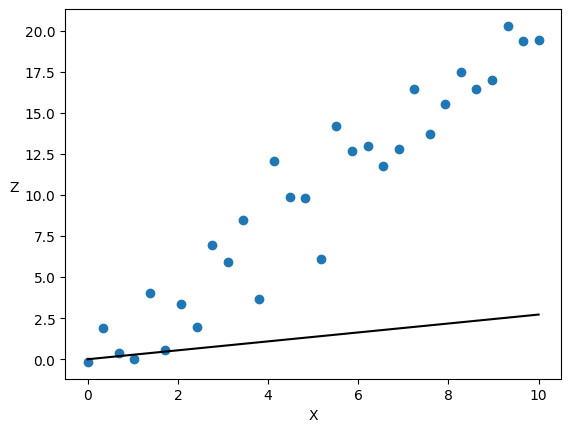

In [22]:
z_p = a*x

plt.scatter(x, z)
plt.plot(x, z_p, 'k')
plt.xlabel('X')
plt.ylabel('Z  ', rotation=0)
plt.show()

Pero vemos que con el valor de `a` que hemos establecido, la neurona no es capaz de asemejarse a los puntos.

Necesitamos saber cómo de bueno o malo es el valor de `a`, de modo que calculamos el error de la salida de la neurona con respecto a los datos que tenemos. Para ello usamos el error cuadrático medio (ECM) o mean squared error (MSE) mediante la fórmula 

$$loss = \frac{\sum_{i=1}^{N} \left(z_p-z\right)^2}{N}$$

Ahora mismo nuestro error es

In [23]:
error = loss(z, z_p)
error

103.72263739946467

Como ya tenemos una manera de medir el error, queremos disminuir el error, de modo que buscamos que el gradiente del error con respecto a `a` sea cero, o lo más cercano a cero. Para ello hacemos un bucle de entrenamiento en el que modificamos el valor de `a` mediante la fórmula

$$a' = a - \alpha\frac{\partial loss}{\partial a}$$

Donde $\alpha$ se denomina tasa de aprendizaje o learning rate y determina la velocidad de aprendizaje

In [24]:
lr = 10**-3 # Tasa de aprendizaje o learning rate
steps = 100  # Numero de veces que se realiza el bucle de enrtenamiento

# Matrices donde se guardarán los datos para luego ver la evolución del entrenamiento en una gráfica
Zs = np.empty([steps, len(x)])
Xs_linea_gradiente = np.empty([steps, len(x_inicio)])
Zs_linea_gradiente = np.empty([steps, len(z_inicio)])
As = np.empty(steps)
Errores = np.empty(steps)


for i in range(steps):
    # Calculamos el gradiente
    dl = gradiente(a, x, z)

    # Corregimos el valor de a
    a = a - lr*dl

    # Calculamos los valores que obtiene la red neuronal
    z_p = a*x

    # Obtenemos el error
    error = loss(z, z_p)

    # Obtenemos las rectas de los gradientes para representarlas
    x_linea_gradiente, z_linea_gradiente = gradiente_linea(i_inicio, a=a, error=error, gradiente=dl)

    # Guardamos los valores para luego ver la evolución del entrenamiento en una gráfica
    As[i] = a
    Zs[i,:] = z_p
    Errores[i] = error
    Xs_linea_gradiente[i,:] = x_linea_gradiente
    Zs_linea_gradiente[i,:] = z_linea_gradiente

    # Imprimimos la evolución del entrenamiento
    if (i+1)%10 == 0:
        print(f"i={i+1}: error={error}, gradiente={dl}, a={a}")

i=10: error=28.075728775043547, gradiente=-61.98100236918255, a=1.1394358551489718
i=20: error=9.50524503591466, gradiente=-30.709631939506394, a=1.569284692740735
i=30: error=4.946395605365449, gradiente=-15.215654116766258, a=1.7822612353503635
i=40: error=3.8272482302958437, gradiente=-7.5388767490642445, a=1.887784395436304
i=50: error=3.552509863476323, gradiente=-3.7352756707945205, a=1.9400677933076504
i=60: error=3.4850646173147437, gradiente=-1.8507112931062708, a=1.9659725680580205
i=70: error=3.4685075514689503, gradiente=-0.9169690786711168, a=1.978807566971417
i=80: error=3.464442973977972, gradiente=-0.4543292594425819, a=1.9851669041474533
i=90: error=3.4634451649256888, gradiente=-0.22510581958202128, a=1.9883177551597053
i=100: error=3.463200213782052, gradiente=-0.111532834297016, a=1.989878902465877


Vemos que el error a disminuido notablemente, de 103,72 que teníamos inicialmente a 3,46 que tenemos ahora.

Representamos la evolución del entrenamiento para verlo gráficamente

![GIF](GIFs/entrenamiento_regresion.gif)